## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
wholeData = pd.merge(mouse_metadata, study_results, how = "outer")

# Display the data table for preview
wholeData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
print(wholeData["Mouse ID"].nunique())


249


In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
both = ["Mouse ID", "Timepoint"]
# get both columns in a variable
dupTrash = wholeData.loc[wholeData.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dupTrash

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
# Come back to this


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = wholeData.drop_duplicates(subset = both)
cleanData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Checking the number of mice in the clean DataFrame.
print(cleanData["Mouse ID"].nunique())

249


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

volume = cleanData["Tumor Volume (mm3)"]
regimen = cleanData["Drug Regimen"]

tumorMean = volume.groupby(regimen).mean()
tumorMedian = volume.groupby(regimen).median()
var = volume.groupby(regimen).var()
std = volume.groupby(regimen).std()
sem = volume.groupby(regimen).sem()

summaryFrame = pd.DataFrame({"Mean Volume" : tumorMean,
                            "Median Volume" : tumorMedian,
                            "Volume Variance" : var,
                            "Volume Standard Deviation" : std,
                             "Volume Standard Error" : sem
                            })

summaryFrame.head(20)


,Mean Volume,Median Volume,Volume Variance,Volume Standard Deviation,Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimenGroupTable = cleanData.groupby("Drug Regimen").agg(["mean",
                                        "median",
                                        "var",
                                        "std",
                                        "sem"
                                       ])["Tumor Volume (mm3)"]

regimenGroupTable.rename(columns = {"mean" : "Mean Volume",
                                    "median" : "Median Volume",
                                    "var" : "Volume Variance",
                                    "std" : "Volume Standard Deviation",
                                    "sem" : "Volume Standard Error"
                                   }, inplace = True)

regimenGroupTable.head()


,Mean Volume,Median Volume,Volume Variance,Volume Standard Deviation,Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Total Number of Measurments')

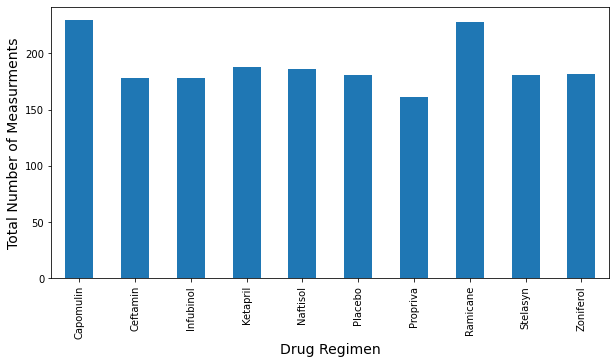

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouseCountByTreatment = wholeData.groupby(["Drug Regimen"]).count()["Mouse ID"]
print(mouseCountByTreatment) # order bars by size???

pandasBarChart = mouseCountByTreatment.plot.bar(figsize = (10, 5))
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Total Number of Measurments", fontsize = 14)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

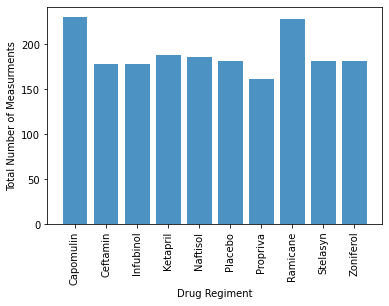

In [86]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xAxis = mouseCountByTreatment.index.values
yAxis = mouseCountByTreatment.values

plt.bar(xAxis, yAxis, alpha = 0.8, align = "center")

plt.xlabel("Drug Regiment")
plt.ylabel("Total Number of Measurments")
plt.xticks(rotation = "vertical")


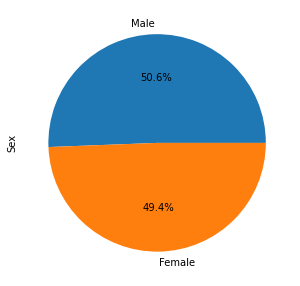

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseGenderData = wholeData["Sex"].value_counts()

plot = mouseGenderData.plot.pie(y = "Sex", figsize = (5, 5), autopct = "%1.1f%%")


Text(0, 0.5, 'Sex')

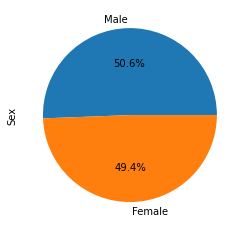

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [50.6, 49.4]
plot = mouseGenderData.plot.pie(y = "Total Count", autopct = "%1.1f%%")
plt.ylabel("Sex")



## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capFrame = wholeData.loc[wholeData["Drug Regimen"] == "Capomulin",:]
capLast = capFrame.groupby("Mouse ID").max()["Timepoint"]
capVol = pd.DataFrame(capLast)
capMerge = pd.merge(capVol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")

ramFrame = wholeData.loc[wholeData["Drug Regimen"] == "Ramicane", :]
ramLast = ramFrame.groupby("Mouse ID").max()["Timepoint"]
ramVol = pd.DataFrame(ramLast)
ramMerge = pd.merge(ramVol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")

infFrame = wholeData.loc[wholeData["Drug Regimen"] == "Infubinol", :]
infLast = infFrame.groupby("Mouse ID").max()["Timepoint"]
infVol = pd.DataFrame(infLast)
infMerge = pd.merge(infVol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")

cefFrame = wholeData.loc[wholeData["Drug Regimen"] == "Ceftamin", :]
cefLast = cefFrame.groupby("Mouse ID").max()["Timepoint"]
cefVol = pd.DataFrame(cefLast)
cefMerge = pd.merge(cefVol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
DRUGS = ["Capomulin", "Ramicane", "Infubinol", "Cerftamin"]

# Create empty list to fill with tumor vol data (for plotting)
plottingData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
